In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 15)

import sys
sys.path.insert(0,'/home/dalong/data/coco2017/cocoapi/PythonAPI/')
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools import mask as maskUtils

import numpy as np
import cv2
import os

In [3]:
ImageRoot='/home/dalong/data/coco2017/train2017'
AnnoFile='/home/dalong/data/coco2017/annotations/person_keypoints_train2017.json'

root = ImageRoot
coco = COCO(AnnoFile)
catIds = coco.getCatIds(catNms=['person']);
imgIds = sorted(coco.getImgIds(catIds=catIds))

loading annotations into memory...
Done (t=7.48s)
creating index...
index created!


In [9]:
print len(imgIds)

64115


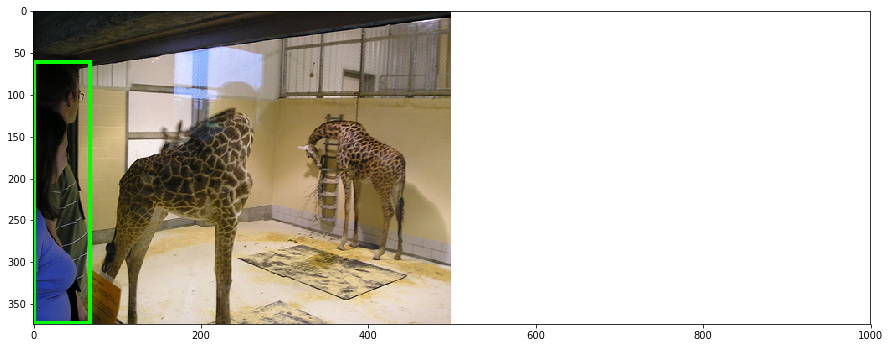

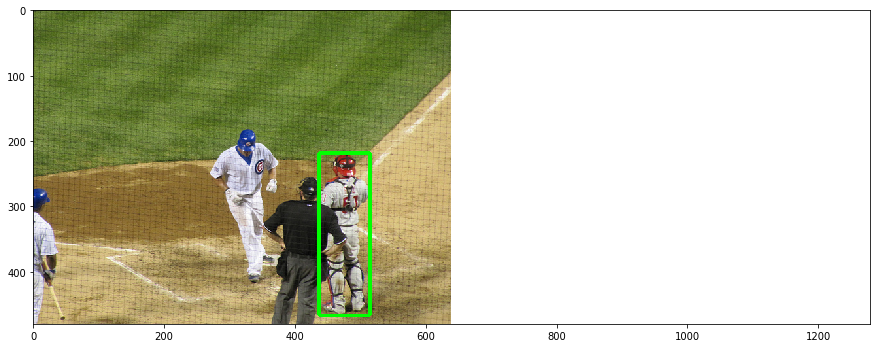

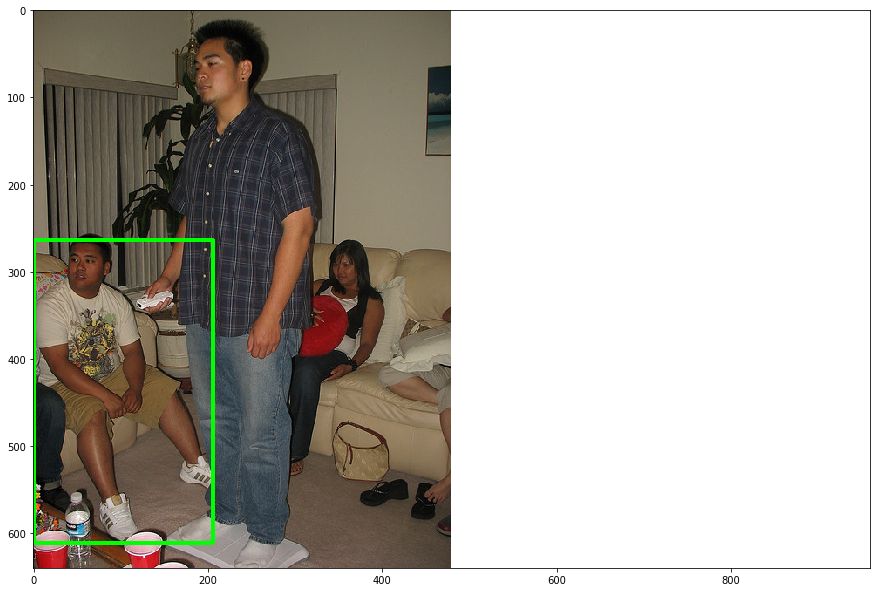

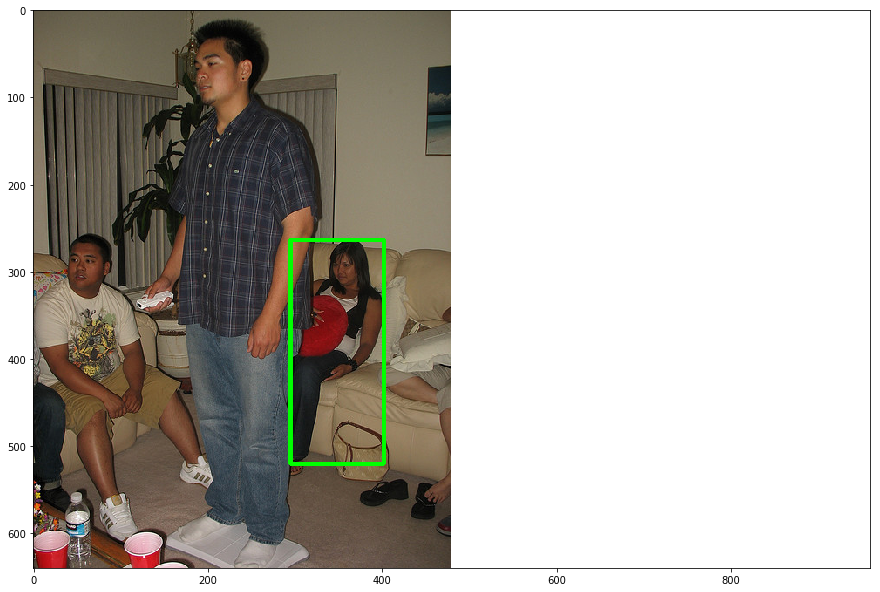

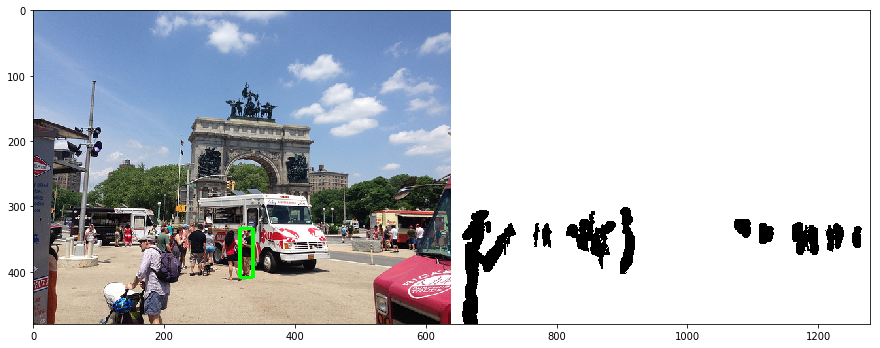

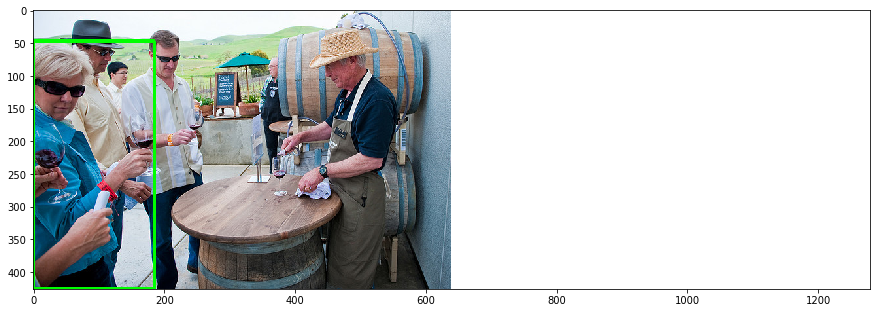

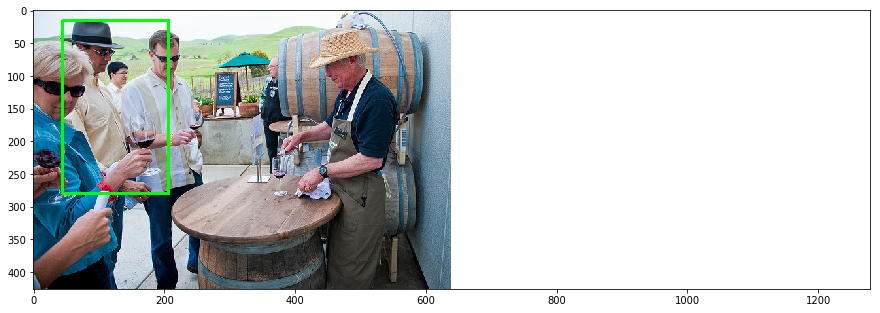

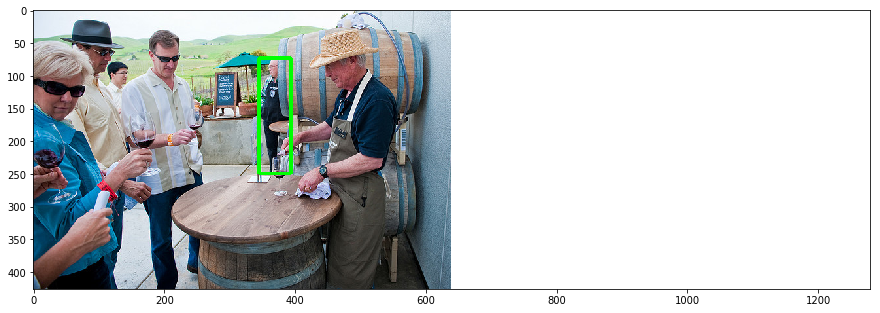

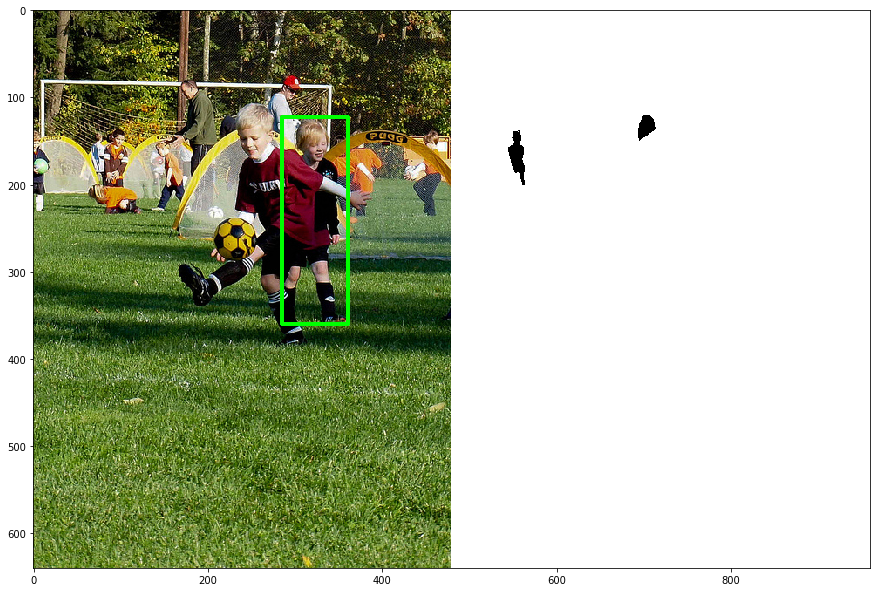

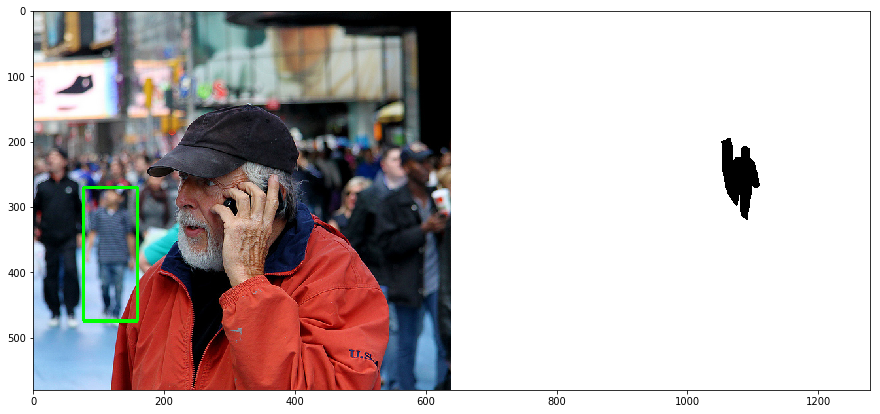

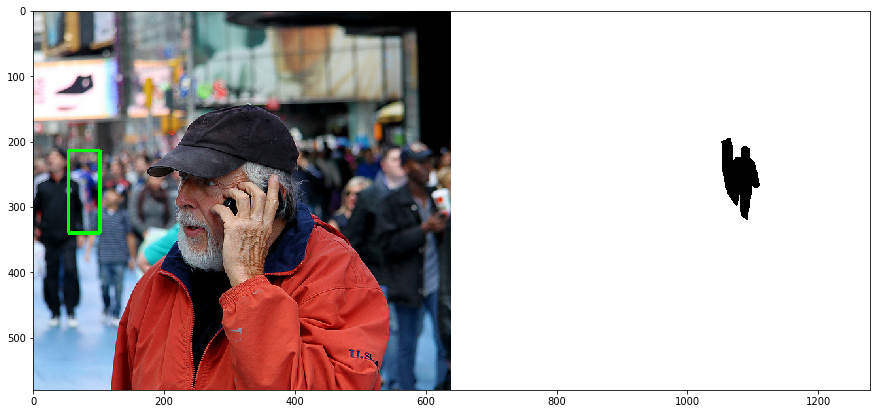

In [26]:
cnt = 0
for img_id in imgIds:
    # basic info
    path = coco.loadImgs(img_id)[0]['file_name']
    height = coco.loadImgs(img_id)[0]['height']
    width = coco.loadImgs(img_id)[0]['width']
    anno_ids = coco.getAnnIds(imgIds=img_id)
    annos = coco.loadAnns(anno_ids)
    prev_center = []
    for anno in annos:
        if anno['num_keypoints'] == 0 or anno['area'] < 32*32:
            continue
        if anno['bbox'][-1]==0 or anno['bbox'][-2]==0:
            continue
        
        x,y,w,h = [int(v) for v in anno['bbox']]
        person_center = [x+w/2.0, y+h/2.0]
        flag = 0
        for pc in prev_center :
            dist = np.array(pc[0:2]) - np.array(person_center)
            if np.sqrt(dist[0]*dist[0]+dist[1]*dist[1]) < pc[2]*0.3:
                flag = 1
                
        if flag == 1:
            cnt += 1
            image = cv2.imread(os.path.join(root, path))
            x,y,w,h = [int(v) for v in anno['bbox']]
            cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 3)
            ignoremask = cv2.imread(os.path.join('ignoremasks', path.replace('jpg', 'png')))
            plt.imshow(np.hstack((image[:,:,::-1], ignoremask*255)))
            plt.show()
        else:
            prev_center.append( [person_center[0], person_center[1], max(w,h)] )
            
            if cnt > 10:
                break
        if cnt > 10:
            break
    if cnt > 10:
        break
            #print anno
            #continue
#         break
#     break


In [ ]:
for i = trainIdx
    numPeople = length(RELEASE(i).annorect);
    fprintf('prepareJoint: %d/%d (numPeople: %d)\n', i, trainIdx(end), numPeople);
    %allPeopleAnno = RELEASE.annolist(i).annorect;
    prev_center = [];

    if mode == 1
        if i < 2645
            validationCount = validationCount + 1;
            fprintf('My validation! %d, %d\n', i, validationCount);
            isValidation = 1;
        else
            isValidation = 0;
        end
    else
        isValidation = 0;
    end

    h = RELEASE(i).annorect.img_height;
    w = RELEASE(i).annorect.img_width;

    for p = 1:numPeople

        % skip this person if parts number is too low or if
        % segmentation area is too small
        if RELEASE(i).annorect(p).num_keypoints < 5 || RELEASE(i).annorect(p).area < 32*32
            continue;
        end
        % skip this person if the distance to exiting person is too small
        person_center = [RELEASE(i).annorect(p).bbox(1)+RELEASE(i).annorect(p).bbox(3)/2, RELEASE(i).annorect(p).bbox(2)+RELEASE(i).annorect(p).bbox(4)/2];
        flag = 0;
        for k = 1:size(prev_center,1)
            dist = prev_center(k,1:2) - person_center;
            if norm(dist) < prev_center(k,3)*0.3
                flag = 1;
                continue;
            end
        end
        if flag ==1
            continue;
        end

In [55]:
import math
base_lr = 2e-5
gamma = 0.0001
stepsize = 500
iters = np.array(range(1000))

lrs = []
for _iter in iters:
    lr = base_lr * (1.0 / (1 + math.exp(-gamma * (_iter - stepsize))))
    lrs.append(lr)

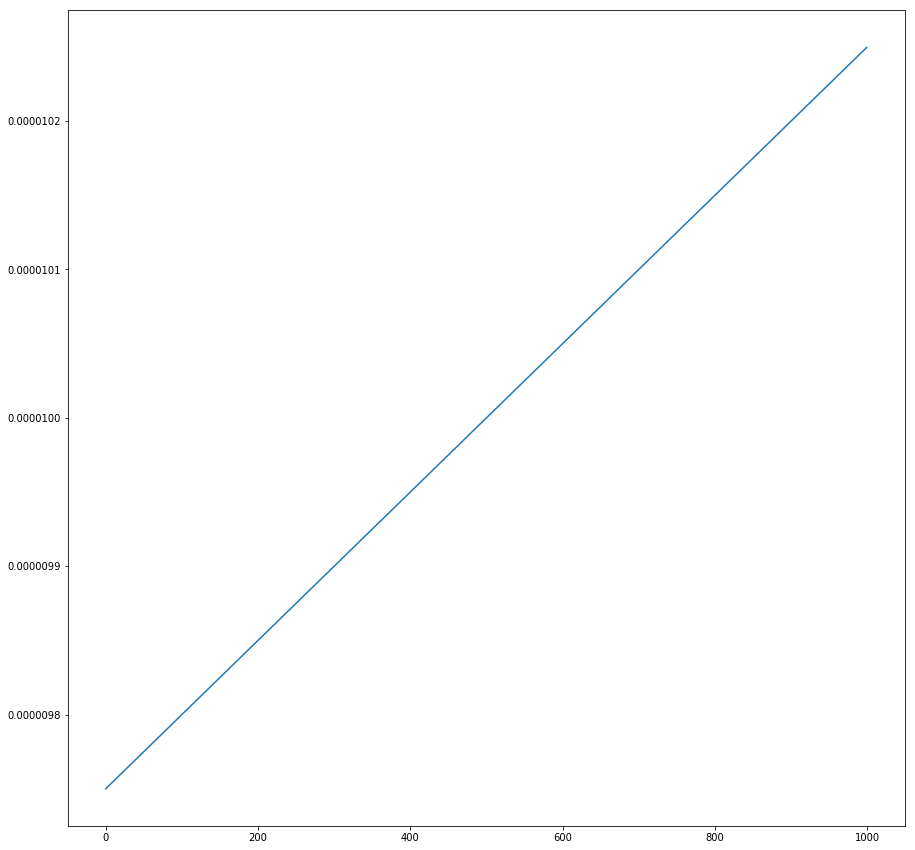

In [56]:
plt.plot(iters,lrs)  

In [1]:
import torch

In [10]:
a = torch.tensor([0., 0., 0.], requires_grad=True)
b = torch.tensor([1., 1., 1.], requires_grad=True)
c = 3*a + 2*b
d = 0.1*a + 0.2*b
(c+d).sum().backward()
print a.grad, b.grad


tensor([ 3.1000,  3.1000,  3.1000]) tensor([ 2.2000,  2.2000,  2.2000])
